In [205]:
import numpy as np
import matplotlib.pyplot as plt
import collections

!pip install wget

-----------------
### Question 1
How many times does **AGGT** or its reverse complement (**ACCT**) occur in the lambda virus genome?  E.g. if **AGGT** occurs 10 times and **ACCT** occurs 12 times, you should report 22.


#### Answer

In [206]:
# download lambda virus genome
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2022-12-04 09:24:27--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 108.139.241.231, 108.139.241.200, 108.139.241.209, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|108.139.241.231|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.3’

lambda_virus.fa.3   100%[===================>]  48.12K  --.-KB/s    in 0.06s   

2022-12-04 09:24:28 (856 KB/s) - ‘lambda_virus.fa.3’ saved [49270/49270]



In [207]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

# read in genome
genome = readGenome('lambda_virus.fa')

print(f"Number of times 'AGGT' appears in lamdba virus genome: {len(naive('AGGT', genome ))}")
print(f"Total ('AGGT' + complement): {len(naive('AGGT', genome)) + len(naive(reverseComplement('AGGT'), genome ))}")

Number of times 'AGGT' appears in lamdba virus genome: 150
Total ('AGGT' + complement): 306


---------------------
### Question 2
How many times does **TTAA** or its reverse complement occur in the lambda virus genome?  

Hint: **TTAA** and its reverse complement are equal, so remember not to double count.

#### Answer
The reverse complement of **5'-TTAA-3'** is **5'-TTAA-3'** making this a palindromic sequence. (Remember to reverse the directionality to make sure it reads from the 5-prime end to the 3-prime end).Therefore we only count it once.

In [132]:
print(f"Number of times TTAA is found in the lambda virus: {len(naive('TTAA', genome))}")

Number of times TTAA is found in the lambda virus: 195


In [208]:
# Just to check that our reverseComplement function is working correclty ...
# len(naive(reverseComplement('TTAA'), genome))

-----------------
### Question 3
What is the offset of the leftmost occurrence of **ACTAAGT** or its reverse complement in the Lambda virus genome?  E.g. if the leftmost occurrence of **ACTAAGT** is at offset 40 (0-based) and the leftmost occurrence of its reverse complement **ACTTAGT** is at offset 29, then report 29.

#### Answer

In [137]:
read = 'ACTAAGT'
print(f"Leftmost offest of sequence: {naive(read,genome)[0]}")
print(f"Leftmost offset of complement: {naive(reverseComplement(read), genome)[0]}")

Leftmost offest of sequence: 27733
Leftmost offset of complement: 26028


The complement occurs at a lower index.

-----------------
### Question 4
What is the offset of the leftmost occurrence of **AGTCGA** or its reverse complement in the Lambda virus genome?


In [142]:
read = "AGTCGA"
print(f"The reverse complement is: {reverseComplement(read)}")
print(f"Leftmost occurance of sequence: {naive(read,genome)[0]}")
print(f"Leftmost occurance of the complement: {naive(reverseComplement(read), genome)[0]}")

The reverse complement is: TCGACT
Leftmost occurance of sequence: 18005
Leftmost occurance of the complement: 450


#### Answer

The leftmost occurance occurs with the complement.

-----------------
### Question 5
As we will discuss, sometimes we would like to find approximate matches for P in T. That is, we want to find occurrences with one or more differences.

For Questions 5 and 6, make a new version of the *naive* function called **naive_2mm** that allows up to 2 mismatches per occurrence. Unlike for the previous questions, do not consider the reverse complement here.  We're looking for approximate matches for P itself, not its reverse complement.

￼

For example, **ACTTTA** occurs twice in **ACTTACTTGATAAAGT**, once at offset 0 with 2 mismatches, and once at offset 4 with 1 mismatch. So *naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')* should return the list *[0, 4]*.

Hint: See  this [notebook](https://nbviewer.org/github/BenLangmead/ads1-hw-examples/blob/master/hw1_naive_2mm.ipynb) for a few examples you can use to test your *naive_2mm* function.

How many times does **TTCAAGCC** occur in the Lambda virus genome when allowing up to 2 mismatches? 

#### Answer

In [14]:
 def naive_2mm(p,t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        c = 0
        for j in range(len(p)):
            if t[i+j] != p[j]:  # compare characters
                c+=1
                if c>2:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [143]:
# test function --> works as required!
p = 'ACTTTA'
t = 'ACTTACTTGATAAAGT'
naive_2mm(p,t) 

[0, 4]

In [145]:
# actual
r = 'TTCAAGCC'
print(f"Number of times sequnce appears in genome: {len(naive_2mm(r, genome))}")

Number of times sequnce appears in genome: 191


-----------------
### Question 6 
What is the offset of the leftmost occurrence of **AGGAGGTT** in the Lambda virus genome when allowing up to 2 mismatches?


#### Answer

In [147]:
r = 'AGGAGGTT'
print(f"Leftmost offset of sequence: {naive_2mm(r, genome)[0]}")

Leftmost offset of sequence: 49


-----------------
### Question 7 

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 [https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq](https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq)

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0 . If the fourth position from the left has the problem, report 3 . Do whatever analysis you think is needed to identify the bad cycle. It might help to review the "Analyzing reads by position" video.


#### Answer

In [148]:
# Download file
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-12-03 10:47:21--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 108.139.241.148, 108.139.241.231, 108.139.241.209, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|108.139.241.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq.3’

ERR037900_1.first10 100%[===================>] 235.96K   645KB/s    in 0.4s    

2022-12-03 10:47:22 (645 KB/s) - ‘ERR037900_1.first1000.fastq.3’ saved [241626/241626]



In [153]:
# Read genome
genome = readGenome('ERR037900_1.first1000.fastq')

# Inspect genome
genome[:1000]

'@ERR037900.1 509.8.8.8903.80024/1TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC+HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E@ERR037900.2 509.5.68.21343.17610/1TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC+HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############@ERR037900.3 509.5.41.1218.7494/1TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC+HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################@ERR037900.4 509.3.45.14457.64151/1TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC+HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##@ERR037900.5 509.4.43.16809.33112/1AACCCTAACCCTAACCCTAACCCT

In [154]:
# To read genome from FASTQ file
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

# To convert ASCII encoded quality to Q-score
def phred33ToQ(qual):
    return ord(qual) - 33

sequences, qualities = readFastq("ERR037900_1.first1000.fastq")
print(len(sequences[0]))

100


In order to inspect the Q-scores for the entire genome, let's plot a histogram

Text(0, 0.5, 'frequency')

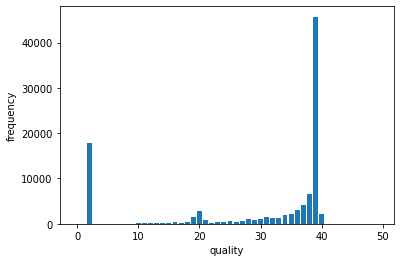

In [163]:
# To creat a histgram of Q-scores (freq-vs-quality)
def createHist(qualities):
    hist_ls = [0]*50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist_ls[q]+=1
    return hist_ls

hist_y = createHist(qualities)
plt.bar(range(len(hist_y)), hist_y)
plt.xlabel('quality')
plt.ylabel('frequency')

There's a spike at 2 (low Q-score); this might be due to clusters where the base caller was not confident in classifying the colour emitted per read. This can happen for a number of reasons - individuals molecules within a cluster can fall out of sync with each other increasing signal-to-noise ratio for example.

To address the question and find out which cycle was a bad one, we need to examine the reads - as data is collected read-by-read in each cycle, we need to find the read index with the minimum Q-score summed over all reads.

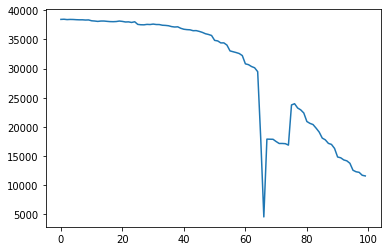

In [187]:
dict_qs = dict(zip(range(len(qualities[0])), [0]*len(qualities[0])))

for qual in qualities:
    for i,q_ in enumerate(qual):
        q = phred33ToQ(q_)
        dict_qs[i] += float(q) 

plt.plot(list(dict_qs.keys()), list(dict_qs.values()))

We see that there is a dip in the Q-scores between the 60th-70th call or cycle. This must be the bad cycle.

In [204]:
value = [i for i in dict_qs if dict_qs[i] == min(dict_qs.values())]
print(f'Bad cycle number: {value[0]}')

Bad cycle number: 66
